# Hierarchisches Clustering

### Was ist hierarchisches Clustering?
Beim hierarchischen Clustering werden Daten Schritt für Schritt gruppiert.
* Zu Beginn ist jeder Punkt ein eigener Cluster.
* Wir suchen die beiden nächstgelegenen Cluster.
* Wir führen sie zusammen.
* Wir wiederholen diesen Vorgang, bis alles in einem großen Cluster zusammengefasst ist.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [2]:
X = np.array([
    [1, 1],
    [1.5, 1.5],
    [5, 5],
    [6, 5],
    [8, 8],
    [9, 8]
])

X.shape

(6, 2)

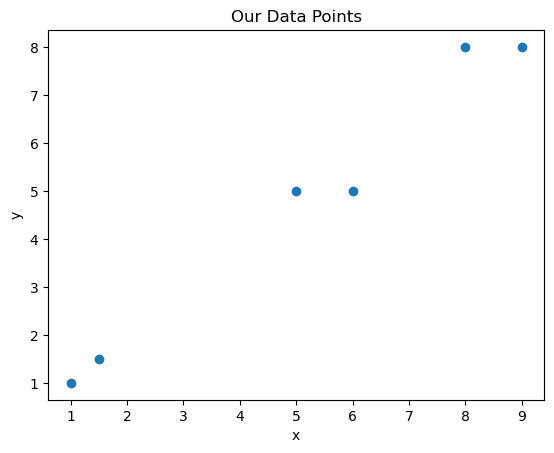

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Our Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
def euclidean_distance(a, b):
    return np.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

In [6]:
def cluster_distance(cluster1, cluster2):
    min_dist = float("inf")
    for p1 in cluster1:
        for p2 in cluster2:
            dist = euclidean_distance(p1, p2)
            if dist < min_dist:
                min_dist = dist
    return min_dist

In [7]:
clusters = [[point] for point in X]

ids = list(range(len(X)))
next_id = len(X)
Z = []

In [8]:
def find_closest_clusters(clusters):
    min_dist = float("inf")
    pair = (0, 1)

    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            dist = cluster_distance(clusters[i], clusters[j])
            if dist < min_dist:
                min_dist = dist
                pair = (i, j)

    return pair, min_dist

In [9]:
while len(clusters) > 1:
    (i, j), dist = find_closest_clusters(clusters)

    Z.append([ids[i], ids[j], dist, len(clusters[i]) + len(clusters[j])])

    new_cluster = clusters[i] + clusters[j]

    clusters.pop(j)
    clusters.pop(i)
    ids.pop(j)
    ids.pop(i)

    clusters.append(new_cluster)
    ids.append(next_id)
    next_id += 1

Z = np.array(Z, dtype=float)

In [11]:
print(Z)

[[0.         1.         0.70710678 2.        ]
 [2.         3.         1.         2.        ]
 [4.         5.         1.         2.        ]
 [7.         8.         3.60555128 4.        ]
 [6.         9.         4.94974747 6.        ]]


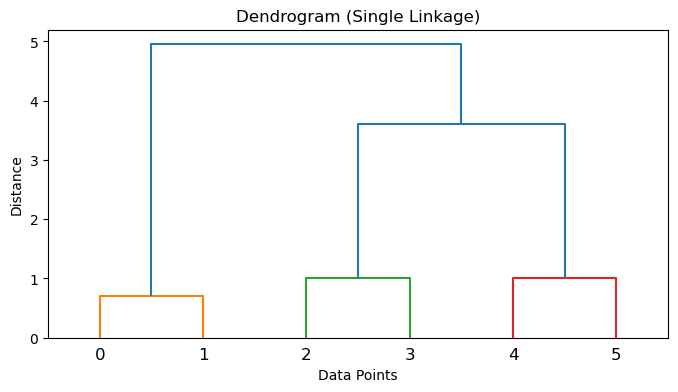

In [10]:
plt.figure(figsize=(8, 4))
dendrogram(Z)
plt.title("Dendrogram (Single Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()